Problem Statement:

Predict whether a passenger survived or not based on features like passenger class (Pclass), age, sex, fare, and more.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
titanic = sns.load_dataset('titanic')

In [6]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
titanic['age'].fillna(titanic['age'].mean(), inplace = True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(['deck', 'class', 'who', 'adult_male', 'alive', 'embark_town'], axis=1, inplace=True)


<ipython-input-7-4f3d32c306b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace = True)
<ipython-input-7-4f3d32c306b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [8]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
alone,0


In [9]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


In [11]:
# Encode Categorical Variables
titanic['sex'] = LabelEncoder().fit_transform(titanic['sex'])

In [12]:
titanic['sex'].value_counts()

,count
sex,
1,577
0,314


In [13]:
titanic['sex']

,sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
titanic['embarked'].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [15]:
titanic['embarked'] = LabelEncoder().fit_transform(titanic['embarked'])

In [16]:
titanic['embarked'].value_counts()

,count
embarked,
2,646
0,168
1,77


In [17]:
# Features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

In [18]:
X.dtypes

,0
pclass,int64
sex,int64
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,int64


In [19]:
scalar = StandardScaler()
X[['age', 'fare']] = scalar.fit_transform(X[['age', 'fare']])

<ipython-input-19-5310d4c40a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'fare']] = scalar.fit_transform(X[['age', 'fare']])


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Convert target to categorical (one-hot encoding for Keras)
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [24]:
#Build the model

model = Sequential(
    [
        Dense(32, activation='relu', input_shape=(X_train.shape[1], )),
        Dropout(0.2),
        Dense(16, activation = 'relu'),
        Dense(2, activation = 'softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=50, batch_size = 32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5258 - loss: 0.7094 - val_accuracy: 0.6503 - val_loss: 0.6494
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6013 - loss: 0.6627 - val_accuracy: 0.6573 - val_loss: 0.6133
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5874 - loss: 0.6355 - val_accuracy: 0.6503 - val_loss: 0.5955
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6318 - loss: 0.6209 - val_accuracy: 0.6643 - val_loss: 0.5832
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5986 - val_accuracy: 0.6923 - val_loss: 0.5707
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.5816 - val_accuracy: 0.7133 - val_loss: 0.5560
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6594 - loss: 0.6109 - val_accuracy: 0.7133 - val_loss: 0.5412
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7136 - loss: 0.5617 - val_accuracy: 0.7343 - val_loss

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8273 - loss: 0.4321


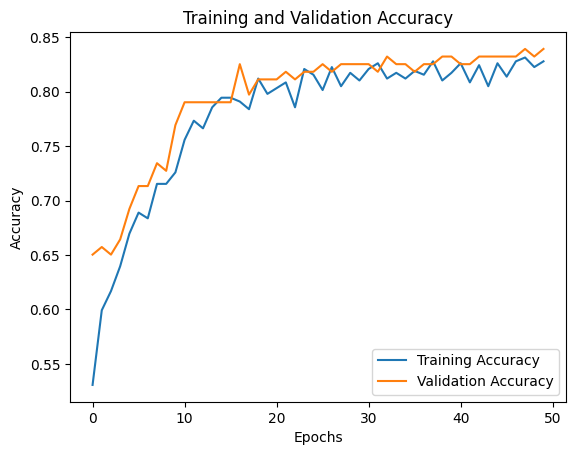

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

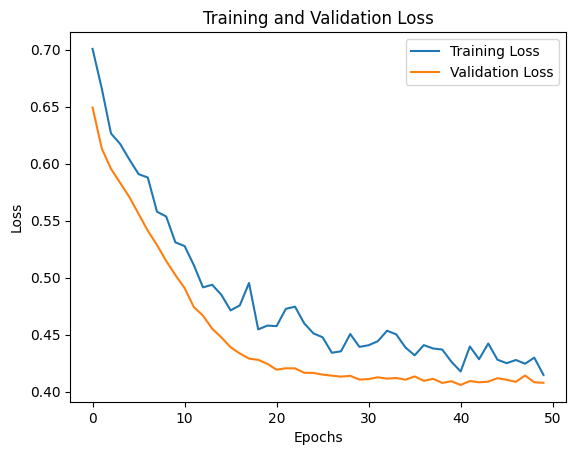

In [29]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [30]:
# Single prediction
single_sample = np.array(X_test.iloc[0]).reshape(1, -1)
single_prediction = model.predict(single_sample)
print(f"Predicted Survival Probabilities: {single_prediction}")
print(f"Predicted Class: {np.argmax(single_prediction)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted Survival Probabilities: [[0.8379884  0.16201164]]
Predicted Class: 0


In [32]:
y_test[0]

array([False,  True])

In [31]:
# Batch predictions
batch_predictions = model.predict(X_test[:5])
print(f"Predicted Survival Probabilities (Batch): {batch_predictions}")
print(f"Predicted Classes (Batch): {np.argmax(batch_predictions, axis=1)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Survival Probabilities (Batch): [[0.8379884  0.16201164]
 [0.87312055 0.12687944]
 [0.8653591  0.13464083]
 [0.06299422 0.93700576]
 [0.25197253 0.74802744]]
Predicted Classes (Batch): [0 0 0 1 1]


In [33]:
# Save the model
model.save('titanic_survival_model.h5')


In [34]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('titanic_survival_model.h5')

# Now you can use `loaded_model` for predictions or further training


In [36]:
# Assuming `x_test` is your test data and is preprocessed correctly
predictions = loaded_model.predict(X_test)

# Display the predictions
print(predictions)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.8379884  0.16201164]
 [0.87312055 0.12687944]
 [0.8653591  0.13464083]
 [0.06299422 0.93700576]
 [0.2519725  0.7480274 ]
 [0.01984008 0.9801598 ]
 [0.45832574 0.54167414]
 [0.87711066 0.12288922]
 [0.46923488 0.5307651 ]
 [0.07255399 0.927446  ]
 [0.73569727 0.2643028 ]
 [0.9166474  0.08335256]
 [0.7384542  0.26154578]
 [0.85865927 0.14134078]
 [0.8805708  0.11942926]
 [0.0665803  0.9334196 ]
 [0.7294394  0.2705606 ]
 [0.45800275 0.5419973 ]
 [0.8576715  0.14232853]
 [0.68427926 0.31572074]
 [0.87819713 0.12180284]
 [0.7956026  0.20439748]
 [0.48327824 0.5167218 ]
 [0.8640619  0.13593802]
 [0.8888734  0.11112661]
 [0.8353869  0.16461301]
 [0.83059925 0.16940074]
 [0.8706282  0.12937178]
 [0.71179974 0.2882002 ]
 [0.38380304 0.616197  ]
 [0.86201304 0.13798685]
 [0.4581118  0.54188806]
 [0.71670216 0.28329775]
 [0.40560228 0.5943978 ]
 [0.8584075  0.1415925 ]
 [0.81820977 0.18179026]
 [0.7154101  0.28458995]
 [0.45832574 0.54167414]
 [0.19660711

In [37]:
import numpy as np

# Convert predictions to class labels (0 or 1)
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [42]:
# Assuming `x_test` is a DataFrame, and you want to predict for the first row (index 0):
single_sample = X_test.iloc[0].values.reshape(1, -1)  # Ensuring it's a 2D array with shape (1, num_features)

# Now make a prediction
single_prediction = loaded_model.predict(single_sample)

# Convert the predicted probability to a class label
single_class = np.argmax(single_prediction, axis=1)

print(f"Prediction for the first sample: {single_class[0]} (0: Not Survived, 1: Survived)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction for the first sample: 0 (0: Not Survived, 1: Survived)
